1. Biểu diễn dữ liệu

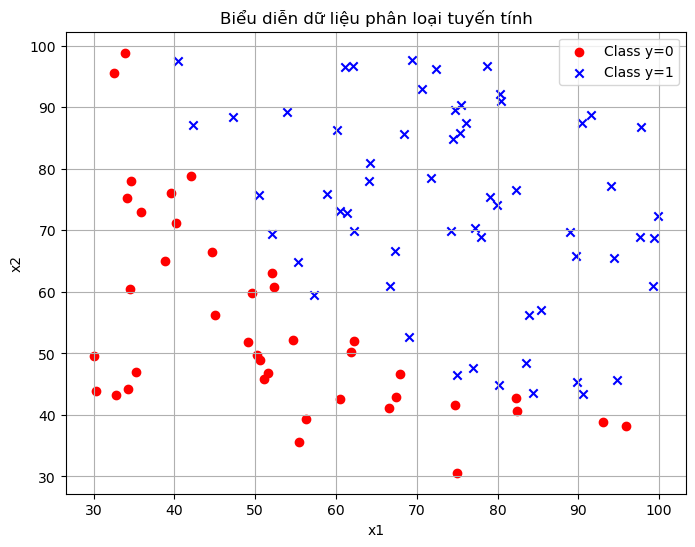

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data4.txt", header=None)
df.columns = ['x1', 'x2', 'y']

x1 = df['x1'].values
x2 = df['x2'].values
y = df['y'].values

x1_col = x1.reshape(-1, 1)  # (n,1)
x2_col = x2.reshape(-1, 1)  # (n,1)

x1_0 = x1[y == 0]
x2_0 = x2[y == 0]
x1_1 = x1[y == 1]
x2_1 = x2[y == 1]

plt.figure(figsize=(8, 6))
plt.scatter(x1_0, x2_0, color='red', marker='o', label='Class y=0')
plt.scatter(x1_1, x2_1, color='blue', marker='x', label='Class y=1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Biểu diễn dữ liệu phân loại tuyến tính')
plt.legend()
plt.grid(True)
plt.show()

2. Chuẩn hóa dữ liệu: scale dữ liệu, format kích thước dữ liệu

In [ ]:
x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
x1_range = np.max(x1) - np.min(x1)
x2_range = np.max(x2) - np.min(x2)

x1_norm = (x1 - x1_mean) / x1_range
x2_norm = (x2 - x2_mean) / x2_range

X_scaled = np.column_stack([x1_norm, x2_norm]) #mx2

X_b = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled]) #mx3
y = df['y'].values.reshape(-1, 1)

print("X shape:", X_b.shape)  # (m, 3)
print("y shape:", y.shape)  # (m, 1)

X shape: (100, 3)
y shape: (100, 1)


3. Viết chương trình cho phép học các tham số của mô hình phân loại tuyến tính

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X_b, y, theta):
    m = y.shape[0]
    h = sigmoid(X_b @ theta)
    epsilon = 1e-5 #skip log(0)
    cost = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost.item()

def gradient_descent(X_b, y, alpha=0.01, num_iters=1000):
    m, n = X_b.shape
    theta = np.zeros((n, 1))
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X_b @ theta)
        gradient = (1/m) * (X_b.T @ (h - y))
        theta -= alpha * gradient
        J = compute_cost(X_b, y, theta)
        J_history.append(J)

    return theta, J_history

4. Tính J ở mỗi vòng lặp, và vẽ biểu đồ J ở các giá trị learning rate khác nhau sau khi chạy hết các vòng lặp

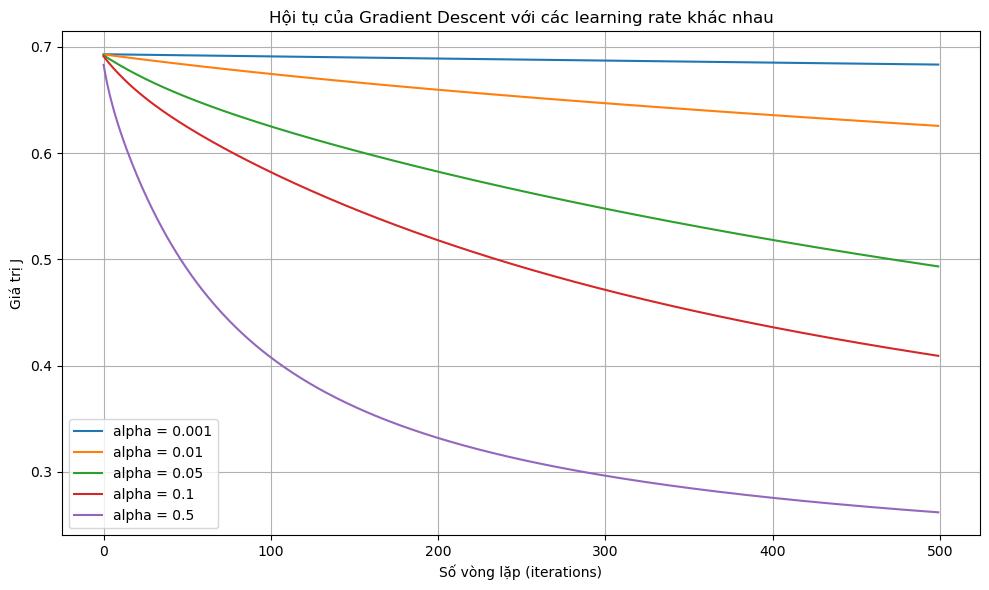

In [ ]:
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
num_iters = 500

J_histories = {}

for alpha in learning_rates:
    _, J_history = gradient_descent(X_b, y, alpha=alpha, num_iters=num_iters)
    J_histories[alpha] = J_history

plt.figure(figsize=(10, 6))

for alpha, J_history in J_histories.items():
    plt.plot(range(len(J_history)), J_history, label=f'alpha = {alpha}')

plt.xlabel('Số vòng lặp (iterations)')
plt.ylabel('Giá trị J')
plt.title('Hội tụ của Gradient Descent với các learning rate khác nhau')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


5. Biển diễn đường phân loại (decision boundary) học được và dữ liệu trên cùng 1 hình ảnh.

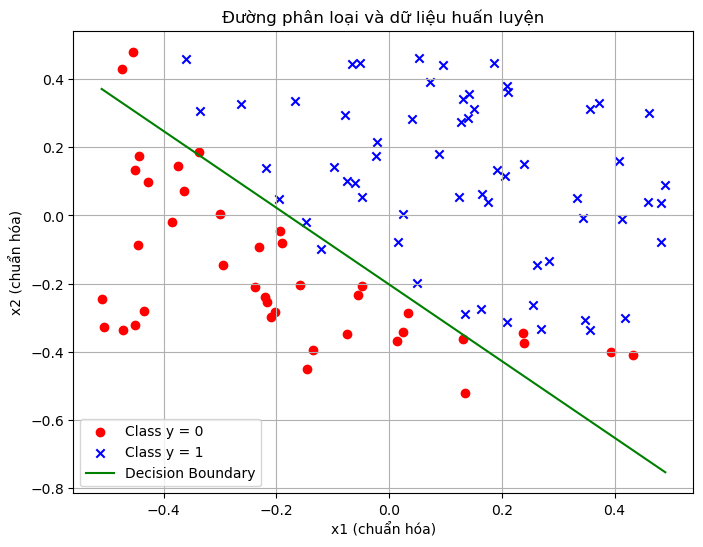

In [67]:
theta_final, _ = gradient_descent(X_b, y, alpha=0.1, num_iters=500)

x1_0 = X_b[y.ravel() == 0][:, 1]
x2_0 = X_b[y.ravel() == 0][:, 2]
x1_1 = X_b[y.ravel() == 1][:, 1]
x2_1 = X_b[y.ravel() == 1][:, 2]

plt.figure(figsize=(8, 6))
plt.scatter(x1_0, x2_0, color='red', marker='o', label='Class y = 0')
plt.scatter(x1_1, x2_1, color='blue', marker='x', label='Class y = 1')

theta = theta_final.ravel()
x1_vals = np.linspace(X_b[:, 1].min(), X_b[:, 1].max(), 100)
x2_vals = -(theta[0] + theta[1] * x1_vals) / theta[2]

plt.plot(x1_vals, x2_vals, color='green', label='Decision Boundary')

plt.xlabel('x1 (chuẩn hóa)')
plt.ylabel('x2 (chuẩn hóa)')
plt.title('Đường phân loại và dữ liệu huấn luyện')
plt.legend()
plt.grid(True)
plt.show()